In [1]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./dataset_with_sent.tsv', delimiter='\t', lineterminator='\n')
df.head()

,id,speaker_id,speaker_label,parent_id,addressee_id,addressee_label,subreddit,text,is_comment,compound_VADER,neg_VADER
0,43lpuz,moving-target,Liberal,NaN,NaN,NaN,SandersForPresident,Oh man msnbc is just full on making shit up an...,False,-0.5574,0.205
1,43lpwo,TaylorSwift2014,Liberal,NaN,NaN,NaN,SandersForPresident,Where online will I be able to view results as...,False,0.0000,0.000
2,43lq2k,writingtoss,Liberal,NaN,NaN,NaN,SandersForPresident,"On Iowa; or, On, Iowa!",False,0.0000,0.000
3,43lqdn,flameruler94,Liberal,NaN,NaN,NaN,SandersForPresident,Best way to follow results tomorrow?,False,0.6369,0.000
4,43lqfg,JASJMS,Liberal,NaN,NaN,NaN,SandersForPresident,Any more polls coming out before tomorrow night?,False,0.0000,0.000


In [3]:
# Load Skipped IDs (text = NaN)
with open('./src/skipped_ids.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        skipped_ids = row
        
print(len(skipped_ids))

print("Initially: ", df.shape)
df = df.loc[~df['id'].isin(skipped_ids)] # Remove empty text rows
print("After: ", df.shape)

915
Initially:  (8124848, 11)
After:  (8123933, 11)


In [4]:
df['speaker_label'].value_counts()

Liberal         4636518
Conservative    3487415
Name: speaker_label, dtype: int64

Text(0.5, 1.0, "Distribution of VADER's compound score (8.1M)")

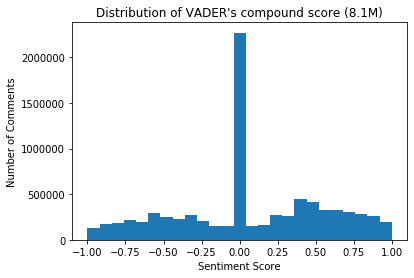

In [5]:
plt.hist(df['compound_VADER'].tolist(), bins=25)
plt.ylabel('Number of Comments')
plt.xlabel('Sentiment Score')
plt.title("Distribution of VADER's compound score (8.1M)")

Text(0.5, 1.0, "Distribution of VADER's neg score (8.1M)")

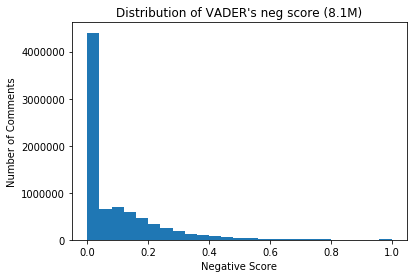

In [6]:
plt.hist(df['neg_VADER'].tolist(), bins=25)
plt.ylabel('Number of Comments')
plt.xlabel('Negative Score')
plt.title("Distribution of VADER's neg score (8.1M)")

### Using the recommended <a href='https://github.com/cjhutto/vaderSentiment#about-the-scoring'>standardized threshold scores</a> for binning into positive, negative, & neutral:

In [7]:
def f(row):
    if row['compound_VADER'] >= 0.05:
        val = 'positive'
    elif row['compound_VADER'] <= -0.05:
        val = 'negative'
    elif row['compound_VADER'] > -0.05 and row['compound_VADER'] < 0.05:
        val = 'neutral'
    else:
        print("Why! Text = ", row['text'], "Senti-score = ", row['compound_VADER'])
        val = -1000000
    return val

df['sentiment'] = df.apply(f, axis=1)
df.head()

,id,speaker_id,speaker_label,parent_id,addressee_id,addressee_label,subreddit,text,is_comment,compound_VADER,neg_VADER,sentiment
0,43lpuz,moving-target,Liberal,NaN,NaN,NaN,SandersForPresident,Oh man msnbc is just full on making shit up an...,False,-0.5574,0.205,negative
1,43lpwo,TaylorSwift2014,Liberal,NaN,NaN,NaN,SandersForPresident,Where online will I be able to view results as...,False,0.0000,0.000,neutral
2,43lq2k,writingtoss,Liberal,NaN,NaN,NaN,SandersForPresident,"On Iowa; or, On, Iowa!",False,0.0000,0.000,neutral
3,43lqdn,flameruler94,Liberal,NaN,NaN,NaN,SandersForPresident,Best way to follow results tomorrow?,False,0.6369,0.000,positive
4,43lqfg,JASJMS,Liberal,NaN,NaN,NaN,SandersForPresident,Any more polls coming out before tomorrow night?,False,0.0000,0.000,neutral


### 1. Only by Speaker Label (8.1 million comments):

Text(0.5, 1.0, 'Sentiment distrbution by Speaker Label (8.1M)')

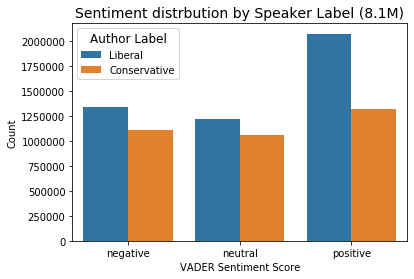

In [8]:
p4 = sns.countplot(x=df['sentiment'], hue=df['speaker_label'], order=("negative", "neutral", "positive"))
p4.set_xlabel('VADER Sentiment Score')
p4.set_ylabel('Count')
p4.legend(title='Author Label', title_fontsize=12)
p4.set_title('Sentiment distrbution by Speaker Label (8.1M)', fontsize=14)

In [9]:
# Remove comments corresponding to unknown addressee(s):
df = df[df['addressee_label'].notna()]
df.shape

(2907737, 12)

In [10]:
def f(row):
    if row['speaker_label'] == 'Liberal' and row['addressee_label'] == 'Conservative':
        val = 'LC'
        
    elif row['speaker_label'] == 'Liberal' and row['addressee_label'] == 'Liberal':
        val = 'LL'
        
    elif row['speaker_label'] == 'Conservative' and row['addressee_label'] == 'Liberal':
        val = 'CL'
        
    elif row['speaker_label'] == 'Conservative' and row['addressee_label'] == 'Conservative':
        val = 'CC'
    else:
        print("Text = ", row['text'])
        val = -1000000
    return val

df['interlocutors'] = df.apply(f, axis=1)
df.head()

,id,speaker_id,speaker_label,parent_id,addressee_id,addressee_label,subreddit,text,is_comment,compound_VADER,neg_VADER,sentiment,interlocutors
64321,d1fkcdl,alleycatzzz,Liberal,4c716a,cmplxgal,Liberal,SandersForPresident,Has there been any counts as to what the absen...,True,0.1280,0.038,positive,LL
64323,d1fkcfd,mahakali_overdrive2,Liberal,d1fk7oy,Gummalillan,Liberal,SandersForPresident,"If we don't act now, this could look like Ariz...",True,0.4411,0.028,positive,LL
64324,d1fkcg3,JustDoinThings,Conservative,4c6w6h,Lightfiend,Conservative,The_Donald,tbqh it is our fault for not preparing for the...,True,-0.2230,0.061,negative,CC
64325,d1fkcg5,mindcracked,Liberal,d1fjm7l,jc5504,Liberal,politics,&gt; He has clear opinions on all the issues t...,True,0.5423,0.136,positive,LL
64327,d1fkcip,WideLight,Liberal,d1fjnix,mrninja101,Liberal,hillaryclinton,"&gt;The truth, in fact, lies in the middle gro...",True,-0.7343,0.244,negative,LL


### 2. Both by Addressee & Speaker Label (2.9 million comments):

Text(0.5, 1.0, 'Sentiment distribution for Speaker-Addressee (2.9M)')

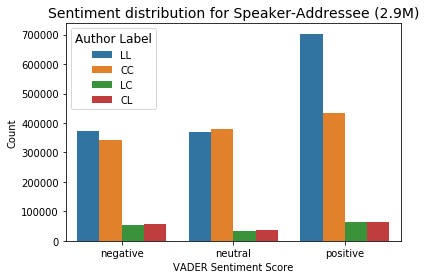

In [11]:
p4 = sns.countplot(x=df['sentiment'], hue=df['interlocutors'], order=("negative", "neutral", "positive"))
p4.set_xlabel('VADER Sentiment Score')
p4.set_ylabel('Count')
p4.legend(title='Author Label', title_fontsize=12)
p4.set_title('Sentiment distribution for Speaker-Addressee (2.9M)', fontsize=14)

Text(0.5, 1.0, 'Sentiment distribution for InGroup/OutGroup (2.9M)')

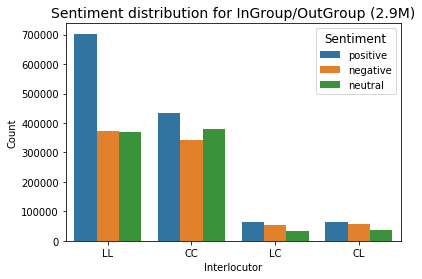

In [12]:
p4 = sns.countplot(x=df['interlocutors'], hue=df['sentiment'], order=("LL", "CC", "LC", "CL"))
p4.set_xlabel('Interlocutor')
p4.set_ylabel('Count')
p4.legend(title='Sentiment', title_fontsize=12)
p4.set_title('Sentiment distribution for InGroup/OutGroup (2.9M)', fontsize=14)

### Only for OutGroup:

Text(0.5, 1.0, 'Sentiment distribution only for OutGroup (2.9M)')

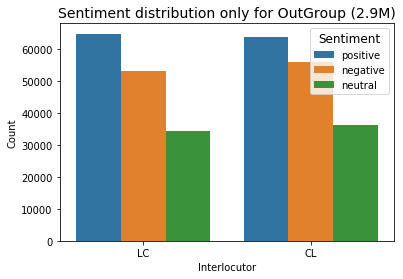

In [14]:
p4 = sns.countplot(x=df['interlocutors'], hue=df['sentiment'], order=("LC", "CL"))
p4.set_xlabel('Interlocutor')
p4.set_ylabel('Count')
p4.legend(title='Sentiment', title_fontsize=12)
p4.set_title('Sentiment distribution only for OutGroup (2.9M)', fontsize=14)